<a href="https://colab.research.google.com/github/pratikshaa12/Deep-learning/blob/main/Multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multiclass classification - Weather prediction

In [24]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Data ingestion

In [25]:
import pandas as pd
url1 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/train_weather.csv"
df =pd.read_csv(url1)
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [26]:
df["Weather Type"].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

### Step 2 - Perform basic data quality checks

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [28]:
df.isna().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [29]:
df.duplicated().sum()

0

### Step 3 - Separate X and Y(Weather Type)

In [30]:
x = df.drop(columns=["Weather Type"])
y = df[["Weather Type"]]

In [31]:
x.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain


In [32]:
y.head()

,Weather Type
0,Rainy
1,Cloudy
2,Sunny
3,Sunny
4,Rainy


In [33]:
y.value_counts()

,count
Weather Type,
Cloudy,3300
Rainy,3300
Snowy,3300
Sunny,3300


### Step 4 - Perform preprocessing on x

In [34]:
x.dtypes

,0
Temperature,float64
Humidity,int64
Wind Speed,float64
Precipitation (%),float64
Cloud Cover,object
Atmospheric Pressure,float64
UV Index,int64
Season,object
Visibility (km),float64
Location,object


In [35]:
cat = list(x.columns[x.dtypes == "object"])
con  =list(x.columns[x.dtypes != "object"])

In [36]:
cat

['Cloud Cover', 'Season', 'Location']

In [37]:
con

['Temperature',
 'Humidity',
 'Wind Speed',
 'Precipitation (%)',
 'Atmospheric Pressure',
 'UV Index',
 'Visibility (km)']

In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [39]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [40]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)

)

In [41]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, con),
        ("cat", cat_pipe, cat)
    ]
).set_output(transform = "pandas")

In [42]:
x_pre = pre.fit_transform(x)
x_pre.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_clear,cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,-0.878846,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [43]:
y.value_counts()

,count
Weather Type,
Cloudy,3300
Rainy,3300
Snowy,3300
Sunny,3300


### Apply one hot encoding on Y data

In [45]:
ohe = OneHotEncoder(
    handle_unknown="ignore", sparse_output=False
).set_output(transform = "pandas")
y_pre = ohe.fit_transform(y)
y_pre.head()

,Weather Type_Cloudy,Weather Type_Rainy,Weather Type_Snowy,Weather Type_Sunny
0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0


### Step 5 - Train test split

In [46]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(x_pre, y_pre, test_size= 0.2, random_state=42)

In [47]:
xtrain.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_clear,cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain
3958,0.740404,-0.134243,-0.554712,1.200664,0.117804,-0.520104,-1.175461,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2239,-0.237413,1.351385,0.169040,0.105042,0.299802,-1.038715,-0.433923,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3608,0.510330,-0.530410,-0.482337,-1.334918,0.525351,1.554340,1.049153,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6848,1.603184,0.757134,5.018179,0.981540,-0.364746,-0.520104,-1.027154,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6119,-0.064857,-0.134243,0.603291,-1.366221,-0.155596,-0.779410,0.752538,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [48]:
ytrain.head()

,Weather Type_Cloudy,Weather Type_Rainy,Weather Type_Snowy,Weather Type_Sunny
3958,0.0,1.0,0.0,0.0
2239,0.0,1.0,0.0,0.0
3608,0.0,0.0,0.0,1.0
6848,0.0,1.0,0.0,0.0
6119,1.0,0.0,0.0,0.0


In [49]:
xtest.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_clear,cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain
4111,0.222737,-1.520829,-0.771838,-1.491435,0.412980,1.295035,1.345768,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10607,2.465964,1.252343,0.675666,0.918933,0.530728,1.554340,-0.433923,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7372,1.200553,-0.877057,-1.133714,-1.303614,0.519437,1.035729,0.752538,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
11786,-1.502823,0.509529,-0.482337,1.138057,-0.329798,-1.038715,-1.175461,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
12227,0.107699,1.252343,0.024290,1.732823,0.588257,1.813646,1.049153,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [50]:
ytest.head()

,Weather Type_Cloudy,Weather Type_Rainy,Weather Type_Snowy,Weather Type_Sunny
4111,0.0,0.0,0.0,1.0
10607,0.0,0.0,0.0,1.0
7372,0.0,0.0,0.0,1.0
11786,0.0,0.0,1.0,0.0
12227,0.0,0.0,0.0,1.0


In [52]:
ytrain.shape[1]

4

### Step 6 - Build the neural network

In [53]:
xtrain.shape

(10560, 18)

In [54]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping

In [55]:
# Initialize the neural network
model=Sequential()

# Input layer
model.add(Input(shape=(xtrain.shape[1],)))

# hidden layer 1
model.add(Dense(units=32, activation="relu"))

# Dropout layer 1
model.add(Dropout(rate=0.2))

# hidden layer 2
model.add(Dense(units=16, activation="relu"))

# Dropout layer 2
model.add(Dropout(rate=0.1))

# Output layer (softmax)
model.add(Dense(units=ytrain.shape[1], activation="softmax"))

In [56]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,204 (4.70 KB)

 Trainable params: 1,204 (4.70 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [58]:
es = EarlyStopping(monitor="val_loss", patience=20)

In [59]:
hist = model.fit(xtrain, ytrain, validation_split=0.2,  epochs=200, callbacks=[es])

Epoch 1/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5400 - loss: 1.1050 - val_accuracy: 0.8660 - val_loss: 0.4834
Epoch 2/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8309 - loss: 0.5485 - val_accuracy: 0.8835 - val_loss: 0.3552
Epoch 3/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8490 - loss: 0.4506 - val_accuracy: 0.9001 - val_loss: 0.3033
Epoch 4/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8808 - loss: 0.3719 - val_accuracy: 0.9039 - val_loss: 0.2760
Epoch 5/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8798 - loss: 0.3565 - val_accuracy: 0.9110 - val_loss: 0.2568
Epoch 6/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8881 - loss: 0.3285 - val_accuracy: 0.9105 - val_loss: 0.2457
Epoch 7/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8915 - loss: 0.3088 - val_accuracy: 0.9096 - val_loss: 0.2371
Epoch 8/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8869 - loss: 0.3119 - val_accu

#### Plot the learning curve

In [60]:
import matplotlib.pyplot as plt


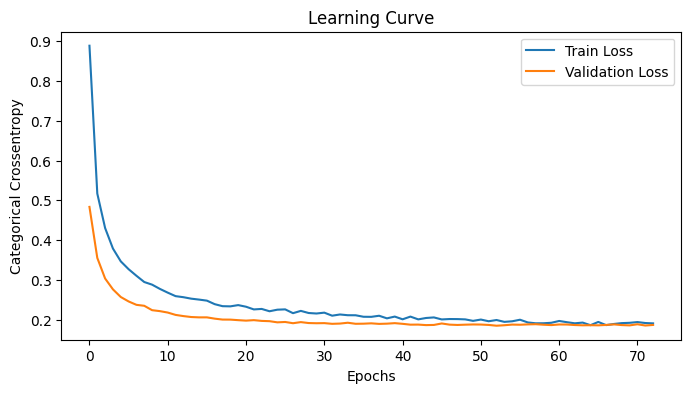

In [61]:
plt.figure(figsize=(8, 4))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.title("Learning Curve")
plt.xlabel("Epochs")
plt.ylabel("Categorical Crossentropy")
plt.legend()
plt.show()

In [62]:
model.evaluate(xtrain, ytrain)

330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9187 - loss: 0.1663


[0.16881948709487915, 0.9194128513336182]

In [63]:
model.evaluate(xtest, ytest)

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9050 - loss: 0.2200


[0.21577869355678558, 0.9045454263687134]

#### Create a function to predict labels

In [64]:
yprob_train =model.predict(xtrain)

330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [65]:
yprob_train[0:5]

array([[6.2036242e-02, 9.1267544e-01, 1.3101273e-02, 1.2187047e-02],
       [4.0857303e-03, 9.9568659e-01, 1.1161267e-04, 1.1610132e-04],
       [7.4020929e-14, 3.6387737e-19, 8.9628859e-15, 9.9999994e-01],
       [2.2628836e-03, 9.9772435e-01, 1.6640040e-06, 1.1106958e-05],
       [9.9998885e-01, 1.4898536e-08, 9.6163566e-09, 1.1128006e-05]],
      dtype=float32)

In [66]:
ytrain.columns

Index(['Weather Type_Cloudy', 'Weather Type_Rainy', 'Weather Type_Snowy',
       'Weather Type_Sunny'],
      dtype='object')

In [67]:
ytrain.columns[0].split("_")[1]

'Cloudy'

In [68]:
labels = [col.split("_")[1] for col in ytrain.columns]
labels

['Cloudy', 'Rainy', 'Snowy', 'Sunny']

In [69]:
ypred_index  =yprob_train.argmax(axis=1)
ypred_index

array([1, 1, 3, ..., 0, 0, 1])

In [71]:
ypred_train = [labels[i] for i in ypred_index]
ypred_train[0:5]

['Rainy', 'Rainy', 'Sunny', 'Rainy', 'Cloudy']

In [72]:
ytrain.head()

,Weather Type_Cloudy,Weather Type_Rainy,Weather Type_Snowy,Weather Type_Sunny
3958,0.0,1.0,0.0,0.0
2239,0.0,1.0,0.0,0.0
3608,0.0,0.0,0.0,1.0
6848,0.0,1.0,0.0,0.0
6119,1.0,0.0,0.0,0.0


In [74]:
ytrain_org = ohe.inverse_transform(ytrain)
ytrain_org[0:5]

array([['Rainy'],
       ['Rainy'],
       ['Sunny'],
       ['Rainy'],
       ['Cloudy']], dtype=object)

In [75]:
ytest_org = ohe.inverse_transform(ytest)
ytest_org[0:5]

array([['Sunny'],
       ['Sunny'],
       ['Sunny'],
       ['Snowy'],
       ['Sunny']], dtype=object)

In [76]:
def predict_labels(model, x):
  yprob= model.predict(x)
  ypred_index = yprob.argmax(axis=1)
  ypred=[labels[i] for i in ypred_index]
  return ypred

In [77]:
ypred_train = predict_labels(model, xtrain)
ypred_train[0:5]

330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


['Rainy', 'Rainy', 'Sunny', 'Rainy', 'Cloudy']

In [78]:
ypred_test = predict_labels(model, xtest)
ypred_test[0:5]

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


['Sunny', 'Sunny', 'Sunny', 'Snowy', 'Sunny']

In [79]:
ytest_org[0:5]

array([['Sunny'],
       ['Sunny'],
       ['Sunny'],
       ['Snowy'],
       ['Sunny']], dtype=object)

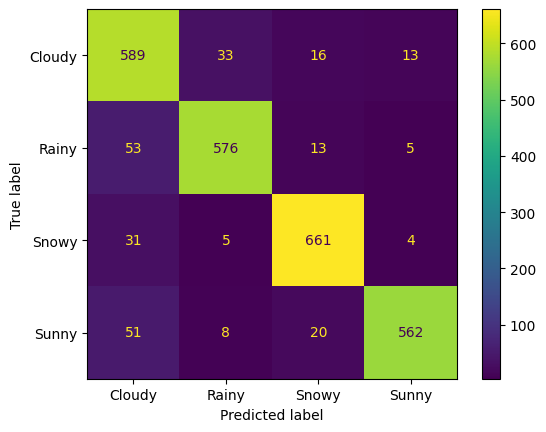

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest_org ,ypred_test)

In [83]:
from sklearn.metrics import classification_report
print(classification_report(ytest_org, ypred_test))

              precision    recall  f1-score   support

      Cloudy       0.81      0.90      0.86       651
       Rainy       0.93      0.89      0.91       647
       Snowy       0.93      0.94      0.94       701
       Sunny       0.96      0.88      0.92       641

    accuracy                           0.90      2640
   macro avg       0.91      0.90      0.90      2640
weighted avg       0.91      0.90      0.91      2640



##### Above shows that model has f1_macro of 0.91> 0.8 hence model is a good model

In [84]:
url2= "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_weather.csv"
xnew= pd.read_csv(url2)
xnew.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,0,68,16.0,66.0,overcast,984.94,0,Winter,2.0,mountain
1,107,107,15.0,83.0,partly cloudy,1015.00,11,Summer,7.0,mountain
2,19,76,12.5,35.0,partly cloudy,1017.26,4,Summer,8.0,inland
3,22,99,18.5,NaN,partly cloudy,1012.70,0,NaN,3.5,inland
4,33,25,8.0,6.0,partly cloudy,1023.77,6,Spring,NaN,inland


In [85]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Temperature', 'Humidity', 'Wind Speed',
                                  'Precipitation (%)', 'Atmospheric Pressure',
                                  'UV Index', 'Visibility (km)']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Cloud Cover', 'Season', 'Location'])])

In [86]:
xnew_pre  =pre.transform(xnew)
xnew_pre.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_clear,cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain
0,-1.100192,-0.035201,0.892792,0.386773,-0.561530,-1.038715,-1.027154,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,5.054302,1.896115,0.748042,0.918933,0.246574,1.813646,0.455922,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.007338,0.360966,0.386166,-0.583634,0.307330,-0.001493,0.752538,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.165218,1.499948,1.254668,0.136346,0.184743,-1.038715,-0.582231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.797923,-2.164601,-0.265211,-1.491435,0.482338,0.517118,-0.137308,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [87]:
ypred = predict_labels(model, xnew_pre)
ypred[0:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


['Snowy', 'Sunny', 'Cloudy', 'Rainy', 'Sunny']

In [88]:
probs= model.predict(xnew_pre)
probs[0:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([[2.04686259e-08, 5.22293764e-09, 9.99999821e-01, 1.07520542e-07],
       [1.63070895e-02, 1.26003491e-04, 3.38640930e-05, 9.83533025e-01],
       [9.99059737e-01, 3.64207081e-04, 3.00630800e-05, 5.46113763e-04],
       [3.53757315e-03, 9.96020555e-01, 2.47757853e-04, 1.94029635e-04],
       [3.06560978e-04, 3.38341920e-06, 1.20276076e-04, 9.99569714e-01]],
      dtype=float32)

In [89]:
labels

['Cloudy', 'Rainy', 'Snowy', 'Sunny']

In [90]:
xnew["Weather_pred"]= ypred
xnew[labels]=probs

In [91]:
xnew= xnew.round(4)
xnew

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather_pred,Cloudy,Rainy,Snowy,Sunny
0,0,68,16.0,66.0,overcast,984.94,0,Winter,2.0,mountain,Snowy,0.0000,0.0000,1.0000,0.0000
1,107,107,15.0,83.0,partly cloudy,1015.00,11,Summer,7.0,mountain,Sunny,0.0163,0.0001,0.0000,0.9835
2,19,76,12.5,35.0,partly cloudy,1017.26,4,Summer,8.0,inland,Cloudy,0.9991,0.0004,0.0000,0.0005
3,22,99,18.5,NaN,partly cloudy,1012.70,0,NaN,3.5,inland,Rainy,0.0035,0.9960,0.0002,0.0002
4,33,25,8.0,6.0,partly cloudy,1023.77,6,Spring,NaN,inland,Sunny,0.0003,0.0000,0.0001,0.9996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,27,59,9.5,41.0,overcast,1001.39,4,Spring,8.0,mountain,Cloudy,0.9987,0.0008,0.0000,0.0004
96,73,82,47.0,107.0,overcast,1002.73,0,Winter,0.5,mountain,Rainy,0.0079,0.9921,0.0000,0.0000
97,2,60,3.0,70.0,overcast,994.19,0,Winter,2.0,mountain,Snowy,0.0000,0.0000,1.0000,0.0000
98,33,44,1.5,11.0,clear,1011.95,7,Summer,8.5,inland,Sunny,0.0000,0.0000,0.0000,1.0000


In [94]:
xnew.to_csv("WeatherResults.csv", index=False)

In [95]:
model.save("WeatherModel.keras")